In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
import glob
import os


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
caminho_pasta = '/content/drive/MyDrive/Projects/Paipe/resources'
arquivos_csv = glob.glob(os.path.join(caminho_pasta, '*.csv'))
lista_dataframes = []
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo)
    lista_dataframes.append(df)

df_concatenado = pd.concat(lista_dataframes, ignore_index=True)


In [6]:
df = df_concatenado[['No','Type', 'Region', 'MunicipalityCode', 'Prefecture', 'Municipality',
                     'DistrictName', 'NearestStation', 'TimeToNearestStation',
                     'MinTimeToNearestStation', 'MaxTimeToNearestStation', 'FloorPlan',
                     'Area', 'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo', 'LandShape',
                     'Frontage', 'FrontageIsGreaterFlag', 'TotalFloorArea', 'TotalFloorAreaIsGreaterFlag',
                     'BuildingYear', 'PrewarBuilding', 'Structure', 'Use', 'Purpose', 'Direction',
                     'Classification', 'Breadth', 'CityPlanning', 'CoverageRatio', 'FloorAreaRatio',
                     'Period', 'Year', 'Quarter', 'Renovation', 'Remarks', 'TradePrice']]

In [ ]:
df.shape

(3906518, 38)

## Fazendo conexão com o banco SQLite e salvando o dataframe original

In [ ]:
conn = sqlite3.connect('houses_database.db')
cursor = conn.cursor()

In [ ]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS houses_database (
    No INTEGER PRIMARY KEY,
    Type TEXT,
    Region TEXT,
    MunicipalityCode INTEGER,
    Prefecture TEXT,
    Municipality TEXT,
    DistrictName TEXT,
    NearestStation TEXT,
    TimeToNearestStation TEXT,
    MinTimeToNearestStation INTEGER,
    MaxTimeToNearestStation INTEGER,
    FloorPlan TEXT,
    Area INTEGER,
    AreaIsGreaterFlag INTEGER,
    UnitPrice REAL,
    PricePerTsubo REAL,
    LandShape TEXT,
    Frontage REAL,
    FrontageIsGreaterFlag BOOLEAN,
    TotalFloorArea INTEGER,
    TotalFloorAreaIsGreaterFlag INTEGER,
    BuildingYear INTEGER,
    PrewarBuilding INTEGER,
    Structure TEXT,
    Use TEXT,
    Purpose TEXT,
    Direction TEXT,
    Classification TEXT,
    Breadth REAL,
    CityPlanning TEXT,
    CoverageRatio INTEGER,
    FloorAreaRatio INTEGER,
    Period TEXT,
    Year INTEGER,
    Quarter INTEGER,
    Renovation TEXT,
    Remarks TEXT,
    TradePrice REAL
)
''')

In [ ]:
#df.to_sql('houses_database', conn, if_exists='replace', index=False)

## Análise Exploratória dos Dados

In [ ]:
#df = pd.read_sql('SELECT * FROM houses_database', conn)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906518 entries, 0 to 3906517
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   No                           int64  
 1   Type                         object 
 2   Region                       object 
 3   MunicipalityCode             int64  
 4   Prefecture                   object 
 5   Municipality                 object 
 6   DistrictName                 object 
 7   NearestStation               object 
 8   TimeToNearestStation         object 
 9   MinTimeToNearestStation      float64
 10  MaxTimeToNearestStation      float64
 11  FloorPlan                    object 
 12  Area                         int64  
 13  AreaIsGreaterFlag            int64  
 14  UnitPrice                    float64
 15  PricePerTsubo                float64
 16  LandShape                    object 
 17  Frontage                     float64
 18  FrontageIsGreaterFlag        bool   
 19  

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Remarks,3674658
Renovation,3343122
FloorPlan,3309348
Purpose,2723740
TotalFloorArea,2588858
PricePerTsubo,2522103
UnitPrice,2522103
BuildingYear,2036714
Use,2020044
Structure,1993945


In [7]:
dict_nulos = {
    'No': 0,
    'Remarks': 'Nothing to add',
    'Renovation': 'Unclear',
    'FloorPlan': 'Unclear',
    'Purpose': 'Not defined',
    'TotalFloorArea': 0,
    'PricePerTsubo': 0.0,
    'UnitPrice': 0.0,
    'BuildingYear': 2,
    'Use': 'Unclear',
    'Structure': 'Not defined',
    'Frontage': 0.0,
    'Breadth': 0.0,
    'Classification': 'Not defined',
    'Direction': 'Not defined',
    'LandShape': 'Not defined',
    'Region': 'Not defined',
    'CoverageRatio': 0,
    'FloorAreaRatio': 0,
    'MaxTimeToNearestStation': 0,
    'MinTimeToNearestStation':0,
    'TimeToNearestStation': 'Not Defined',
    'NearestStation': 'Not Defined',
    'CityPlanning': 'Not Defined',
    'DistrictName': 'Not Defined',
    'Period': 'Not Defined',
    'Year': 2019, # Ultimo ano de referencia
    'Quarter': 0,
    'Type': 'Not Defined',
    'PrewarBuilding': 0,
    'TotalFloorAreaIsGreaterFlag': 0,
    'FrontageIsGreaterFlag': True,
    'AreaIsGreaterFlag': 1,
    'Area': 0,
    'Municipality': 'Not Defined',
    'Prefecture': 'Not Defined',
    'MunicipalityCode': 00000,
    'TradePrice': 0

}

In [8]:
for col in df.columns:
    df[f'{col}'] = df[f'{col}'].fillna(dict_nulos[f'{col}'])

In [9]:
df_region = df[['Region', 'Use','BuildingYear','CoverageRatio',
                'MaxTimeToNearestStation', 'MinTimeToNearestStation',
                'TradePrice']]

df_region = round(df_region.groupby(['Region','Use']).mean())
df_region = df_region.reset_index()
df_region['Region'] = df_region['Region'].fillna(method='ffill')
df_region.head(5)

,Region,Use,BuildingYear,CoverageRatio,MaxTimeToNearestStation,MinTimeToNearestStation,TradePrice
0,Commercial Area,Factory,1702.0,61.0,25.0,21.0,158926447.0
1,Commercial Area,"Factory, Office",1899.0,62.0,28.0,22.0,125908053.0
2,Commercial Area,"Factory, Office, Other",1977.0,65.0,35.0,23.0,206833333.0
3,Commercial Area,"Factory, Office, Parking Lot",1986.0,72.0,14.0,11.0,302900000.0
4,Commercial Area,"Factory, Office, Parking Lot, Shop",1990.0,80.0,14.0,14.0,260000000.0


In [10]:
# Tratamento dos nulos (que agora estão zerados) e da coluna TradePrice para média de cada região e uso.
df_price = df.query('TradePrice == 0')
df_price.rename(columns={'TradePrice': 'Zerados'}, inplace=True)
df_region_price = df_region[['Region', 'Use', 'TradePrice']]
df_price_region = pd.merge(df_price, df_region_price, on=['Region', 'Use'])
df_price_region.drop(columns=['Zerados'], inplace=True)

In [11]:
df_sem_tradeZerado = df.query('TradePrice != 0')
df_2 = pd.concat([df_sem_tradeZerado, df_price_region])
print(df_2.shape)

(3906518, 38)


In [12]:
# Tratamento dos anos que estavam nulos para algo mais aproximado
df_ano = df.query('BuildingYear == 0')
df_ano.rename(columns={'BuildingYear': 'Anos_Zerados'}, inplace=True)
df_region_ano = df_region[['Region', 'Use', 'BuildingYear']]
df_ano_region = pd.merge(df_ano, df_region_ano, on=['Region', 'Use'])
df_ano_region.drop(columns=['Anos_Zerados'], inplace=True)

In [13]:
df_sem_anoZerado = df_2.query('BuildingYear != 0')
df = pd.concat([df_sem_anoZerado, df_ano_region])
print(df.shape)

(3906518, 38)


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
No,0
Breadth,0
BuildingYear,0
PrewarBuilding,0
Structure,0
Use,0
Purpose,0
Direction,0
Classification,0
CityPlanning,0


In [14]:
df['MinTimeToNearestStation'] = df['MinTimeToNearestStation'].astype(int)
df['MaxTimeToNearestStation'] = df['MaxTimeToNearestStation'].astype(int)
df['TotalFloorArea'] = df['TotalFloorArea'].astype(int)
df['BuildingYear'] = df['BuildingYear'].astype(int)
df['CoverageRatio'] = df['CoverageRatio'].astype(int)
df['FloorAreaRatio'] = df['FloorAreaRatio'].astype(int)


In [ ]:
df.describe()

,No,MunicipalityCode,MinTimeToNearestStation,MaxTimeToNearestStation,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,Frontage,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter,TradePrice
count,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06,3.906518e+06
mean,7.835413e+04,2.046713e+04,1.917019e+01,2.262816e+01,4.674023e+02,3.749528e-02,3.017556e+04,9.972649e+04,9.507562e+00,5.907978e+01,2.924343e-03,9.561482e+02,9.860443e-04,4.670245e+00,4.984948e+01,1.707576e+02,2.012866e+03,2.519816e+00,2.760589e+07
std,8.017355e+04,1.217548e+04,2.275312e+01,2.726023e+01,8.476877e+02,1.899721e-01,1.083630e+05,3.578807e+05,1.056054e+01,1.704077e+02,5.399808e-02,9.958803e+02,3.138586e-02,4.967957e+00,2.526929e+01,1.264062e+02,3.678827e+00,1.118905e+00,1.417460e+08
min,1.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,1.000000e+00,1.000000e+02
25%,2.078000e+04,1.220400e+04,5.000000e+00,4.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,8.000000e+01,2.010000e+03,2.000000e+00,5.000000e+06
50%,4.815900e+04,1.721000e+04,1.300000e+01,1.200000e+01,1.850000e+02,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,4.500000e+00,6.000000e+01,2.000000e+02,2.013000e+03,3.000000e+00,1.400000e+07
75%,1.147330e+05,2.811000e+04,2.800000e+01,2.500000e+01,3.700000e+02,0.000000e+00,2.000000e+04,6.600000e+04,1.400000e+01,9.500000e+01,0.000000e+00,1.995000e+03,0.000000e+00,6.000000e+00,6.000000e+01,2.000000e+02,2.016000e+03,4.000000e+00,2.900000e+07
max,4.065750e+05,4.738200e+04,1.200000e+02,1.200000e+02,5.000000e+03,1.000000e+00,2.000000e+07,6.600000e+07,5.000000e+01,2.000000e+03,1.000000e+00,2.020000e+03,1.000000e+00,9.990000e+01,8.000000e+01,1.300000e+03,2.019000e+03,4.000000e+00,6.100000e+10


In [ ]:
'''tamanho_antes = len(df)
print(tamanho_antes)
df.drop_duplicates(inplace=True, ignore_index=True)
tamanho_depois = len(df)
print(tamanho_depois)
print(tamanho_antes - tamanho_depois, 'Linhas a menos que estavam duplicadas')'''

"tamanho_antes = len(df)\nprint(tamanho_antes)\ndf.drop_duplicates(inplace=True, ignore_index=True)\ntamanho_depois = len(df)\nprint(tamanho_depois)\nprint(tamanho_antes - tamanho_depois, 'Linhas a menos que estavam duplicadas')"

In [15]:
mask = np.random.rand(len(df)) < 0.8

df_treino = df[mask]
df_teste = df[~mask]

### Visualizações

In [16]:
import plotly.express as px
import plotly.io as pio

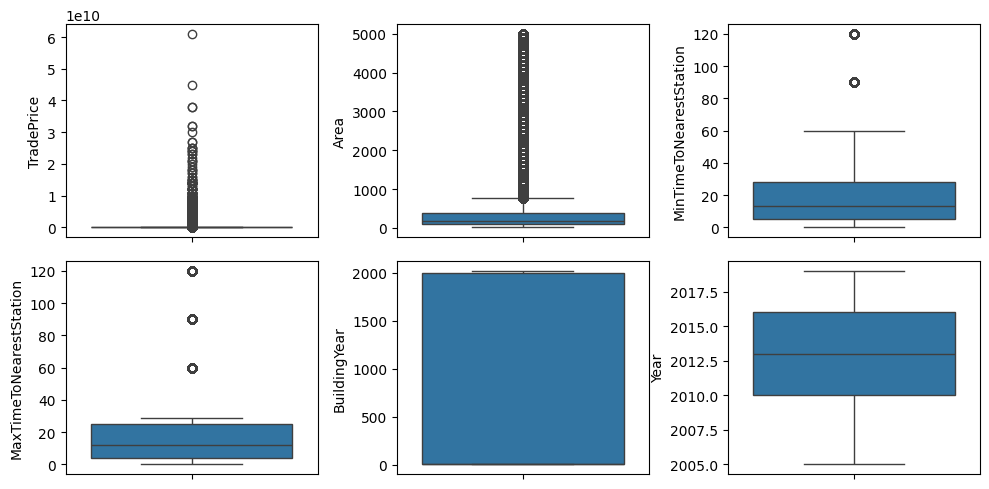

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_treino['TradePrice'], ax = axs[0,0])
plt2 = sns.boxplot(df_treino['Area'], ax = axs[0,1])
plt3 = sns.boxplot(df_treino['MinTimeToNearestStation'], ax = axs[0,2])
plt1 = sns.boxplot(df_treino['MaxTimeToNearestStation'], ax = axs[1,0])
plt2 = sns.boxplot(df_treino['BuildingYear'], ax = axs[1,1])
plt3 = sns.boxplot(df_treino['Year'], ax = axs[1,2])

plt.tight_layout()

In [17]:
Q1 = df_treino['TradePrice'].quantile(0.25)
Q3 = df_treino['TradePrice'].quantile(0.75)

# Calcula o Intervalo Interquartil (IQR)
IQR = Q3 - Q1

limite_inferior = max(Q1 - 1.5 * IQR, 0)  # Garantir que o limite inferior não seja negativo
limite_superior = Q3 + 1.5 * IQR

df_treino_sem_outliers = df_treino[(df_treino['TradePrice'] >= limite_inferior) & (df_treino['TradePrice'] <= limite_superior)]


In [ ]:
print(Q1)
print(Q3)
print(IQR)
print(limite_inferior)
print(limite_superior)

5000000.0
29000000.0
24000000.0
0
65000000.0


<Axes: xlabel='BuildingYear', ylabel='TradePrice'>

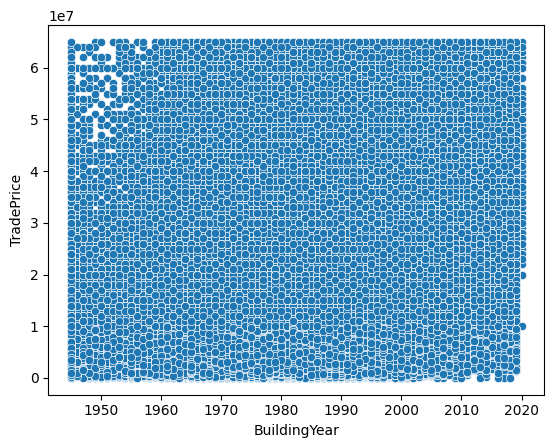

In [18]:
df_treino_sem_outliers_ano = df_treino_sem_outliers.query('BuildingYear > 500')
sns.scatterplot(data=df_treino_sem_outliers_ano, x="BuildingYear", y="TradePrice")

In [ ]:
dict_war = {0: 'Antes da Guerra'  , 1: 'Depois da Guerra', 2: 'Não Definido'}
df_treino_sem_outliers['PrewarBuilding'] = df_treino_sem_outliers['PrewarBuilding'].map(dict_war)
df_war = df_treino_sem_outliers.query('PrewarBuilding != "Não Definido"')
count_guerra = df_war['PrewarBuilding'].value_counts().reset_index()
count_guerra.columns = ['PrewarBuilding', 'Contagem']

fig = px.bar(count_guerra, x='PrewarBuilding', y='Contagem', color='PrewarBuilding')
print(df_treino_sem_outliers['PrewarBuilding'].value_counts())
fig.show()

PrewarBuilding
Antes da Guerra     2950354
Depois da Guerra       2897
Name: count, dtype: int64


Qual a disposição das regiões onde estão os imoveis?

In [ ]:
count_regiao = df_treino_sem_outliers['Region'].value_counts().reset_index()
count_regiao.columns = ['Region', 'Contagem']

fig = px.bar(count_regiao, x='Region', y='Contagem', color='Region')

fig.show()

In [ ]:
df_area_valor2 = df_treino_sem_outliers[['Region', 'Use', 'TradePrice']]
df_area_valor = df_area_valor2.groupby(['Region', 'Use']).sum()
df_area_valor = df_area_valor.reset_index()
df_area_valor['TradePrice'] = df_area_valor['TradePrice'].astype(int)


fig = px.bar(df_area_valor, x='Region', y='TradePrice', color='Region')

fig.show()

In [ ]:
# Distribuição do Trade price

fig = px.histogram(df_treino_sem_outliers, x="TradePrice", nbins=10)
fig.show()

In [ ]:
df_corr = df_treino_sem_outliers[['Area', 'UnitPrice', 'PricePerTsubo', 'Frontage', 'TotalFloorArea',
                      'BuildingYear', 'Breadth', 'CoverageRatio', 'FloorAreaRatio', 'TradePrice']]
sns.heatmap(df_corr.corr())

In [ ]:
from scipy import stats
# Teste de Kolmogorov Smirnov
ks_statistic, p_value = stats.kstest(df_treino_sem_outliers['TradePrice'], 'norm')

print('Estatística de Kolmogorov-Smirnov:', ks_statistic)
print('p-valor:', p_value)

print('******************************************')

df_amostra = df_treino_sem_outliers.sample(n=30)

# Teste de Shapiro-Wilk para a coluna 'TradePrice'
stat, p = stats.shapiro(df_amostra['TradePrice'])

print('Shapiro = %.3f, p-valor = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Amostra possui Distribuição Gaussiana (Considere a Hipótese Nula)')
else:
    print('Amostra não representa uma distribuição Gaussina (Rejeitar Hipótese Nula)')

### Modelo de Regressão Linear

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error

# Selecionando as colunas numéricas
numerical_features = ['Area', 'UnitPrice', 'PricePerTsubo', 'Frontage', 'TotalFloorArea',
                      'BuildingYear', 'Breadth', 'CoverageRatio', 'FloorAreaRatio']

X = df_treino_sem_outliers[numerical_features]  # Features
y = df_treino_sem_outliers['TradePrice']  # Variável alvo


In [20]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criando o modelo de regressão linear
model = LinearRegression()


In [ ]:
# Validando o modelo com k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_log_error')


In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculando métricas de avaliação
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

#rmsle, mape, cv_results.mean()
print(f'RMSLE: {rmsle:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'CV Results: {cv_results.mean():.4f}')

Predição no dataframe de teste

In [ ]:
df_teste['TradePrediction'] = model.predict(df_teste[X_train.columns])
df_teste

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def avaliar_modelo(valores_reais, valores_preditos, alpha=0.05):
    mae = mean_absolute_error(valores_reais, valores_preditos)
    mse = mean_squared_error(valores_reais, valores_preditos)
    rmse = mean_squared_error(valores_reais, valores_preditos, squared=False)
    r2 = r2_score(valores_reais, valores_preditos)

    interpretacao = []

    # Interpretação MAE
    if mae < (0.1 * sum(valores_reais) / len(valores_reais)):
        interpretacao.append("MAE: Semelhante - O erro médio absoluto é relativamente baixo.")
    else:
        interpretacao.append("MAE: Diferente - O erro médio absoluto é relativamente alto.")

    # Interpretação MSE
    if mse < (0.1 * sum([x**2 for x in valores_reais]) / len(valores_reais)):
        interpretacao.append("MSE: Semelhante - O erro quadrático médio é relativamente baixo.")
    else:
        interpretacao.append("MSE: Diferente - O erro quadrático médio é relativamente alto.")

    # Interpretação RMSE
    if rmse < (0.1 * max(valores_reais)):
        interpretacao.append("RMSE: Semelhante - A raiz do erro quadrático médio é relativamente baixa.")
    else:
        interpretacao.append("RMSE: Diferente - A raiz do erro quadrático médio é relativamente alta.")

    # Interpretação R²
    if r2 > 1 - alpha:
        interpretacao.append("R²: Semelhante - O modelo explica bem a variabilidade dos dados.")
    else:
        interpretacao.append("R²: Diferente - O modelo não explica bem a variabilidade dos dados.")

    return {
        'MAE': round(mae,2),
        'MSE': round(mse,2),
        'RMSE': round(rmse,2),
        'R²': round(r2,2),
        'Interpretacao': interpretacao
    }

In [ ]:
avaliar_modelo(df_teste['TradePrice'], df_teste['TradePrediction'], alpha=0.05)

### Modelo de Arvore de Decisão

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
# df_teste.drop(columns=['TradePrediction'], inplace=True)
df_sample = df.sample(frac=0.1, random_state=42)  # Usando 10% dos dados


In [37]:
categorical_features = ['Region', 'Use']
numerical_features = ['Area', 'UnitPrice', 'PricePerTsubo', 'Frontage', 'TotalFloorArea',
                      'BuildingYear', 'Breadth', 'CoverageRatio', 'FloorAreaRatio']

X_train = df_sample[numerical_features + categorical_features]
y_train = df_sample['TradePrice']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [39]:
dt_model = DecisionTreeRegressor(random_state=42)

In [40]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt_model)])

In [41]:
param_grid = {
    'regressor__max_depth': [5, 10],
    'regressor__min_samples_split': [2, 10],
    'regressor__min_samples_leaf': [1, 5]
}

# GridSearch para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_log_error', n_jobs=1)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Area',
                                                                          'UnitPrice',
                                                                          'PricePerTsubo',
                                                                          'Frontage',
                                                                          'TotalFloorArea',
                                                                          'BuildingYear',
                                                                          'Breadth',
                                                                          'CoverageRatio',
                                                                          'FloorAreaRatio']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Region',
                                                                          'Use'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=1,
             param_grid={'regressor__max_depth': [5, 10],
                         'regressor__min_samples_leaf': [1, 5],
                         'regressor__min_samples_split': [2, 10]},
             scoring='neg_mean_squared_log_error')

In [43]:
X_teste = df_teste[numerical_features + categorical_features]

In [44]:
# Fazendo as previsões no dataframe de teste
df_teste['TradePrediction'] = grid_search.best_estimator_.predict(X_teste)

In [47]:
# Calculando métricas de avaliação
rmsle_dt = np.sqrt(mean_squared_log_error(df_teste['TradePrice'], df_teste['TradePrediction']))
mape_dt = mean_absolute_percentage_error(df_teste['TradePrice'], df_teste['TradePrediction'])

print(f'RMSLE: {rmsle_dt}, MAPE: {mape_dt}, Best Parameters: {grid_search.best_params_}')

RMSLE: 1.2706530143493555, MAPE: 8.005582942775423, Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 2}


In [49]:
avaliar_modelo(df_teste['TradePrice'], df_teste['TradePrediction'], alpha=0.05)

{'MAE': 15671536.04,
 'MSE': 1.6659649341380144e+16,
 'RMSE': 129072264.03,
 'R²': 0.19,
 'Interpretacao': ['MAE: Diferente - O erro médio absoluto é relativamente alto.',
  'MSE: Diferente - O erro quadrático médio é relativamente alto.',
  'RMSE: Semelhante - A raiz do erro quadrático médio é relativamente baixa.',
  'R²: Diferente - O modelo não explica bem a variabilidade dos dados.']}

In [51]:
df_treino_sem_outliers.to_csv('df_treino_sem_outliers.csv', index=False)
df_teste.to_csv('df_teste.csv', index=False)